Music In Car music recommender is a powerfull tool that combines information gained about our users musical preferences taking into consideration the context in which the music is listened to. It is at the initial stage of its development but assuming that the dataset obtained by analysis of different aspects of driver behavior will still grow it will be able to create more and more accurate recommendations for our users.

This notebook was created using Google Colab. If it is ran using this type of notebook it is necessary to upload the file using the Code Block below. If Jupyter Notebook is used instead, you can proceed to the next step

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Data-InCarMusic.xlsx to Data-InCarMusic (4).xlsx


The following script was created using Pandas, Numpy, IO and MatPlotLib libraries.
IO library is necessary just for GoogleColab users to upload a dataset file to the notebook.
If Jupyter Notebook is used to open this notebook please use commented lines of code instead of lines above them. 
Please keep in mind that the dataset file should be stored in the same folder with your notebook, or if it is in a different directory, a sufficient prefix containing data location should be used.

The code was created in Python 3.6.7 using the following versions of the libraries: 
Pandas version: 0.25.0
Numpy version: 1.16.4
Matplotlib version: 3.0.3

The CamelCase was used instead of PEP - 8 SnakeCase, what could be found as an inconvinence what the author is sorry about.

In [0]:
import pandas as pd
import numpy as np
import io
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_excel(io.BytesIO(uploaded['Data_InCarMusic.xlsx']))
#df = pd.read_excel(['Data_InCarMusic.xlsx'])
df = df.rename(index=str, columns={" Rating": "Rating", "landscape": "Landscape", "mood": "Mood", "naturalphenomena ": "NaturalPhenomena", "sleepiness": "Sleepiness", "trafficConditions": "TrafficConditions", "weather": "Weather"})

df['Context'] = df[df.columns[3:]].apply(
    lambda x: ''.join(x.dropna().astype(str).astype(str)),
    axis=1
)
df.Context = df.Context.fillna(0)

df['ContextCategory'] = df['Context']

df['MusicCategory'] = df[df.columns[1]]


MusicCategoryDict = {248:1, 250:1, 251:1, 252:1, 253:2, 254:2, 255:2, 256:2, 257:2, 258:3, 259:3, 260:3, 261:3, 262:3, 263:4, 264:4, 265:4, 266:4, 267:4, 268:5, 269:5, 270:5, 271:5, 272:5, 273:6, 274:6, 275:6, 276:6, 277:6, 278:7, 279:7, 280:7, 281:7, 282:7, 283:8, 284:8, 285:8, 286:8, 287:8, 288:9, 289:9, 290:9, 291:9, 292:9, 293:10, 294:10, 295:10, 296:10, 297:10, 249:1, 691:4, 707:10, 729:5, 674:4, 745:4, 675:8, 676:8, 677:8, 678:8, 680:8, 681:8, 682:8, 683:8, 684:8, 685:8, 686:8, 687:8, 688:8, 689:8, 690:8, 692:8, 693:8, 694:8, 695:8, 696:8, 697:8, 698:8, 700:8, 701:8, 702:8, 679:8, 699:8, 703:8, 704:8, 705:8, 706:8, 709:8, 710:8, 712:8, 715:8, 716:8, 719:8, 720:8, 721:8, 722:8, 723:8, 724:8, 725:8, 726:8, 708:4, 711:4, 713:8, 717:8, 727:8, 718:8, 728:8, 714:5, 730:8, 731:8, 733:8, 734:8, 735:8, 736:8, 737:8, 739:8, 740:8, 741:8, 743:8, 744:8, 746:8, 747:8, 748:8, 750:8, 751:8, 753:8, 755:8, 757:8, 749:4, 732:8, 738:8, 742:8, 752:8, 754:8, 756:4, 759:8, 761:8, 760:10, 762:4, 758:8}
MusicCatDict = {1:'Blues music', 2:'Classical music', 3:'Country music', 4:'Disco music', 5:'Hip Hop music', 6:'Jazz music', 7:'Metal music', 8:'Pop music', 9:'Reggae music', 10:'Rock music'}
ContextCatDict = {'relaxed driving':'driving style', 'sport driving':'driving style', 'coast line':'landscape', 'country side':'landscape', 'mountains/hills':'landscape', 'urban':'landscape', 'active':'mood', 'happy':'mood', 'lazy':'mood', 'sad':'mood', 'afternoon':'natural phenomena ', 'day time':'natural phenomena', 'morning':'natural phenomena', 'night':'natural phenomena', 'city':'road type', 'highway':'road type', 'serpentine':'road type', 'awake':'sleepiness', 'sleepy':'sleepiness', 'free road':'traffic conditions', 'lots of cars':'traffic conditions', 'traffic jam':'traffic conditions', 'cloudy':'weather', 'rainy':'weather ', 'snowing':'weather', 'sunny':'weather'}
ArtistDict = {248:'B.B.King', 250:'Mamie Smith', 251:'Robert Johnson', 252:'T-Bone Walker', 253:'Antonio Vivaldi', 254:'Bach', 255:'Beethoven', 256:'Franz Schubert', 257:'George Gershwin', 258:'Charlie Daniels Band', 259:'Hank Williams', 260:'Johnny Cash', 261:'Tammy Wynette', 262:'The Statler Brothers', 263:'Bee Gees', 264:'Chic', 265:'Gloria Gaynor', 266:'Lipps Inc', 267:'Village People', 268:'2Pac', 269:'Coolio', 270:'Notorious B.I.G.', 271:'Run DMC', 272:'Sugarhill Gang', 273:'Art Blakey and The Jazz Messengers', 274:'John Coltrane', 275:'Louis Armstrong', 276:'Miles Davis', 277:'Thelonious Monk', 278:'Amon Amarth', 279:'Hypocrisy', 280:'Iron Maiden', 281:'Metallica', 282:'Pantera', 283:'ABBA', 284:'Britney Spears', 285:'Lady GaGa', 286:'Madonna', 287:'Michael Jackson', 288:'Bob Marley', 289:'Bob Marley', 290:'Desmond Dekker', 291:'The Abyssinians', 292:'Toots And The Maytals', 293:'AC-DC', 294:'Deep Purple', 295:'Dire Straits', 296:'Jimi Hendrix', 297:'The Animals', 249:'Led Zeppelin', 691:'Die Atzen Frauenarzt and Manny Marc', 707:'Nickelback', 729:'Bushido', 674:'Ke$ha', 745:'Frauenarzt and Manny Marc', 675:'Keri Hilson', 676:'STROMAE', 677:'Owl City', 678:'Cheryl Cole', 680:'Lady GaGa', 681:'Amy Macdonald', 682:'Unheilig', 683:'Aura Dione', 684:'Stanfour', 685:'OneRepublic', 686:'Culcha Candela', 687:'Timbaland', 688:'Black Eyed Peas', 689:'Gossip', 690:'Rihanna', 692:'Rihanna', 693:'Revolverheld', 694:'David Guetta - Kid Cudi', 695:'Jason Derulo', 696:'Black Eyed Peas', 697:'Alexandra Burke Feat. Flo Rida', 698:'Ich + Ich', 700:'Muse', 701:'Culcha Candela', 702:'Melanie Fiona', 679:'Iyaz', 699:'Timbaland', 703:'Ich + Ich', 704:'Rihanna', 705:'Black Eyed Peas', 706:'Train', 709:'Agnes', 710:'Calderone Inc.', 712:'Robbie Williams', 715:'OneRepublic', 716:'Xavier Naidoo', 719:'Lisa Mitchell', 720:'Helping Haiti', 721:'Silbermond', 722:'Bryan Adams', 723:'Alicia Keys', 724:'Jan Delay', 725:'Lady GaGa', 726:'P!nk', 708:'Gigi Dagostino', 711:'Sivana', 713:'David Guetta - Akon', 717:'Timbaland', 727:'Xavier Naidoo mit Janet Grogan', 718:'Paul and Fritz Kalkbrenner', 728:'Jurgen Drews', 714:'Jay-Z', 730:'Sportfreunde Stiller', 731:'Wencke Myhre', 733:'Herbert Gr&ouml', 734:'Unheilig', 735:'Topmodelz', 736:'Alexandra Burke', 737:'Ich + Ich', 739:'David Guetta - Estelle', 740:'Fady Maalouf', 741:'Ke$ha featuring 3OH!3', 743:'Avril Lavigne', 744:'Marit Larsen', 746:'Kate Nash', 747:'Jan Delay', 748:'Giovanni', 750:'Eric Chase', 751:'Florence + The Machine', 753:'Shakira', 755:'Unheilig', 757:'Livingston', 749:'Goldfrapp', 732:'Unheilig', 738:'Nena', 742:'Jason Derulo', 752:'Sean Paul', 754:'Jay-Z', 756:'Three 6 Mafia vs. Tiesto with Sean Kingston', 759:'Fettes Brot', 761:'Lady GaGa', 760:'Bon Jovi', 762:'DJ Gollum vs. Basslovers United', 758:'Dominik Buchele'}
TitleDict = {248:"The Thrill is Gone", 250:"Crazy Blues", 251:"Hellhound On My Trail", 252:"Stormy Monday", 253:"Four Seasons", 254:"Brandenburg Concerto 3", 255:"Symphony 5", 256:"Trout Quintet", 257:"Rhapsody in Blue", 258:"The Devil Went Down to Georgia", 259:"Im So Lonesome I Could Cry", 260:"I Walk the Line", 261:"Stand By Your Man", 262:"Flowers On The Wall", 263:"Stayin Alive", 264:"Good Times", 265:"I Will Survive", 266:"Funkytown", 267:"YMCA", 268:"Dear Mama", 269:"Gangsta Paradise", 270:"Hypnotize", 271:"Its Like That", 272:"Rappers Delight", 273:"Moanin", 274:"Giant Steps", 275:"Potato Head Blues", 276:"So What", 277:"Straight No Chaser", 278:"Pursuit Of Vikings", 279:"Apocalypse", 280:"The Trooper", 281:"Master Of Puppets", 282:"Cemetery Gates", 283:"Dancing Queen", 284:"Toxic", 285:"Paparazzi", 286:"Like A Prayer", 287:"Billie Jean", 288:"I Shot The Sheriff", 289:"No Woman No Cry", 290:"Israelites", 291:"Satta Massagana", 292:"Pressure Drop", 293:"You Shook Me All Night Long", 294:"Highway Star", 295:"Sultans of Swing", 296:"Purple Haze", 297:"House of the Rising Sun", 249:"I Can't Quit You Baby", 691:"Disco Pogo", 707:"If Today Was Your Last Day (Album Version)", 729:"Alles wird gut - Album Version", 674:"TiK ToK", 745:"Das Geht Ab (Wir Feiern Die Ganze Nacht)", 675:"I Like - Jost and Grubert", 676:"Alors On Danse", 677:"Fireflies - Album Version", 678:"Fight For This Love", 680:"Bad Romance", 681:"Dont Tell Me That Its Over", 682:"Geboren um zu leben", 683:"I Will Love You Monday (365)", 684:"Wishing You Well - Radio Version", 685:"All The Right Moves", 686:"Monsta", 687:"If We Ever Meet Again (Featuring Katy Perry)", 688:"I Gotta Feeling - Album Version", 689:"Heavy Cross - Album Version", 690:"Rude Boy - Album Version", 692:"Rude Boy - Explicit Version", 693:"Spinner", 694:"Memories (Featuring Kid Cudi)", 695:"Whatcha Say - Main Version", 696:"Meet Me Halfway - Album Version", 697:"Bad Boys", 698:"Einer von Zweien", 700:"Undisclosed Desires - Album Version", 701:"Eiskalt", 702:"Monday Morning - Album Version", 679:"Replay (Album Version)", 699:"Morning After Dark (Featuring Nelly Furtado)", 703:"Pflaster", 704:"Russian Roulette - Album Version", 705:"Rock That Body - Album Version", 706:"Hey", 709:"Release Me", 710:"This Is My Time (Club Edit)", 712:"Morning Sun", 715:"Secrets", 716:"Halte durch", 719:"Neopolitan Dreams", 720:"Everybody Hurts", 721:"Krieger des Lichts - Single Version", 722:"One World One Flame", 723:"Try Sleeping With A Broken Heart", 724:"Hoffnung", 725:"Bad Romance - Radio Edit", 726:"Bad Influence - Main Version", 708:"Moonlight Shadow", 711:"Feels Like Im Dancin (Original Mix)", 713:"Sexy Bitch (Featuring Akon)", 717:"If We Ever Meet Again - International Radio", 727:"Alles kann besser werde", 718:"Sky And Sand", 728:"Ich bau dir ein Schloss - Wolken Mix", 714:"Empire State Of Mind [Jay-Z + Alicia Keys]", 730:"Lass mich nie mehr los - Studio Version", 731:"Eingeliebt - ausgeliebt", 733:"nemeyer", 734:"Mein Stern", 735:"Time to Wonder (Club Mix)", 736:"Hallelujah", 737:"Einer von Zweien - Radio Version", 739:"One Love (Featuring Estelle)", 740:"Into The Light", 741:"Blah Blah Blah", 743:"Alice", 744:"If A Song Could Get Me You", 746:"Foundations - Full Explicit Version", 747:"Hoffnung - Single Version", 748:"I Cant Dance Alone [feat. Ross Antony]", 750:"If You Tolerate This (Club Mix)", 751:"Youve Got The Love", 753:"Gypsy - Album Version", 755:"An deiner Seite", 757:"Go - Single Version", 749:"Rocket", 732:"Fur immer", 738:"Du bist so gut fur mich (Radio Edit)", 742:"In My Head (Album Version)", 752:"Hold My Hand (Original Version)", 754:"Young Forever [Jay-Z + Mr Hudson]", 756:"Feel It", 759:"Jein (Radio Edit)", 761:"Paparazzi", 760:"Superman Tonight - Album Version", 762:"Narcotic", 758:"Closer To Heaven", }



df.MusicCategory = df.MusicCategory.map(MusicCategoryDict)
df.MusicCategory = df.MusicCategory.map(MusicCatDict)
df['ContextCategory'] = df['ContextCategory'].map(ContextCatDict)
df['ContextCategory'] = df['ContextCategory'].fillna('NoContext')
df = df.drop(df.columns[[3,4,5,6,7,8,9,10]], axis=1)


The code block above is used to improve the data readability what means mainly condensing the context columns into two containing context in which the track was rated and context category which corresponds to columns in the original dataset. Also, five dictionaries were created just to be able to apply them to increase the readability of the obtained results. There were created using a simple iterative procedure.

It is made to make data easier accessible for further analysis.


After a deep analysis of the data, it was observed that the specific tracks have the highest rating for a certain context, what brought it to the point where the strongest and the most noticeable and significant relationship was an observer that is Music Category - Context one.
It seems to be an obvious relationship, of course, the track/context relationship is more accurate in case of recommending certain tracks, but the dataset is to rare to be able to make this statistic viable.
The Code Block below prepares and visualizes data frame which presents dependency between average track rate for Music Categories and Context in which they were rated. 

-1 Value on the plots indicates that the dataset does not contain any rate for the MusicCategory in a specific Context.

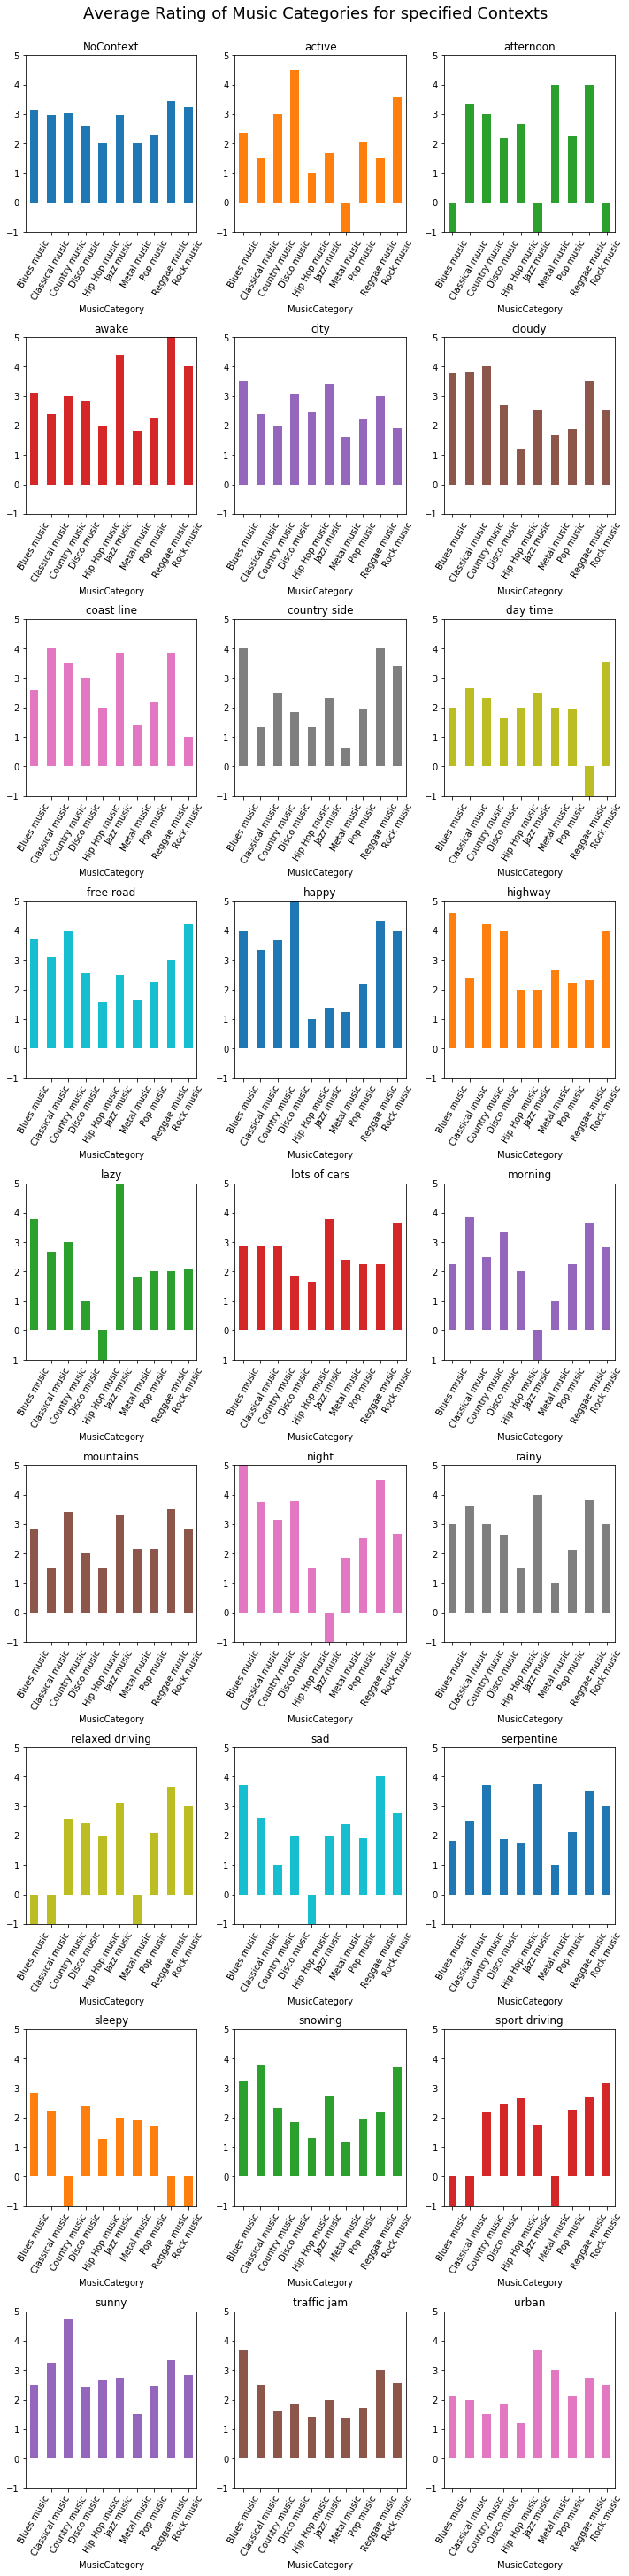

In [0]:
VisData = pd.pivot_table(df, values=['Rating'], index= ['MusicCategory'], columns = ['Context'], aggfunc = np.mean)
VisData = VisData.fillna(-1)

VisData = VisData.Rating
VisData = VisData.rename(columns={VisData.columns[0]: "NoContext" })

axes = VisData.plot.bar(rot=60, subplots=True, figsize = (10,40), layout = (9,3), sharex = False, sharey = False, ylim = (-1,5) ,legend = False)
plt.suptitle(t = 'Average Rating of Music Categories for specified Contexts', size = 18,  y=1.01)
plt.tight_layout()

To make the implementation of certain mechanisms for our Recommender easier, the Data Preparation Function was constructed.
During finding the best matches for a given user in a certain recommendation type we need data to be processed differently.

MeanOfRates, NumOfRates, RateTable, and MeanRating are user for the TopRatedRecommendations, and represents as follows: DataFrame containing rates for each track,  mean values of rates for each track, RateTable that contains an average rating for each track and MeanRating that is a value representing the mean value of all Rates.

ContextData and ContextTrackData are series of DataFrames for each Context where for ContextData the average track rate for each MusicCategory for each user is contained, and the ContextTrackData where instead of MusicCategory data is processed for each user.

NoContextData is DataFrame Containing the average rate value of every track for every user.

For 3 last DataFrames, the synthetic user 1111 is created. The values of its ratings are always average. It is created to be applied as a 'neighbor' for users that happen to be all NaN for a given Context.

In [0]:
def DataPreparation(InputData):

  NumOfRates = InputData.groupby('ItemID').count()
  MeanOfRates = InputData.groupby('ItemID').mean()
  
  Num = NumOfRates['Rating']
  MeanV = MeanOfRates['Rating']
  d = {"NumberOfRates":Num, "AvgRate":MeanV}
  
  RateTable = pd.DataFrame(data=d)
  MeanRating = InputData['Rating'].mean()

  Data = InputData.drop(columns = {'ContextCategory'})
  UniqueContext = Data.Context.unique()
  
  DataFrameDict = {elem : pd.DataFrame for elem in UniqueContext}
  ContextData = {}
  ContextTrackData = {}

  for key in DataFrameDict.keys():
      DataFrameDict[key] = Data[:][Data.Context == key]
      ContextData["{0}".format(key)] = pd.pivot_table(DataFrameDict[key], values=['Rating'], index= ['MusicCategory'], columns = ['UserID'], dropna = False, aggfunc = np.mean).Rating
      ContextData["{0}".format(key)][1111] = ContextData["{0}".format(key)].mean(numeric_only=True, axis=1)
      ContextTrackData["{0}".format(key)] = pd.pivot_table(DataFrameDict[key], values=['Rating'], index= ['ItemID'], columns = ['UserID'], dropna = False, aggfunc = np.mean).Rating  
      ContextTrackData["{0}".format(key)][1111] = ContextTrackData["{0}".format(key)].mean(numeric_only=True, axis=1)
    
  NoContextData = pd.pivot_table(Data, values=['Rating'], index= ['ItemID'], columns = ['UserID'] , dropna = False, aggfunc = np.mean).Rating
  NoContextData[1111] = NoContextData.mean(numeric_only=True, axis=1) 
  
  return NumOfRates, MeanOfRates, RateTable, MeanRating, ContextData, ContextTrackData, NoContextData
    

To find the recommendations the matching user has to be found. It is proceeded by applying Pearson's R between the users for a certain applied classification type.
This is the measure of the correlation between the users- how their ratings are related to each other.
It takes values from -1 to 1
Its value is one when the users have 100% the same profile and their ratings are simply the same, 0 when there is no relation between their rates and -1 when their taste is opposite.
For such a rare dataset if there are NaN values that occurred - without data it is not possible to evaluate this value it is set to zero, what techniques can be considered to be true.

In [0]:
def PearsonsR(X, Y):
  Xcorr = X - X.mean()
  Ycorr = Y - Y.mean()
  
  correlation = np.sum(Xcorr * Ycorr) / np.sqrt(np.sum(Xcorr ** 2) * np.sum(Ycorr ** 2))
  if np.isnan(correlation):
    corelation = 0
  return correlation

Match Finder applies PearsonsR for a given DataSet iterating through it.
If there is no relation found it creates one with a synthetic user 1111 and sets the correlation value for SynthCorVal.
In the loop is if statement prepared if the correlation value happened to be NaN, it is also considered in PearsonsR calculation, but it is used to double-check for that. Often PearsonsR values happen to be very small and can be considered as NaNs.
In this rarity of the data, some users did not have any ratings for a music category in a given context for that case its ID is substituted for 1111 to get the values closest for this user.

During the development of the dataset shown recommendations would change as it will be updated, because it is harder to change the mean value of whole rating(what are the 1111 ratings), but the correlation values for 1111 with other users is easier to change.
Solving this problem that way helps to deal with missing data without a need to fill the dataset with unnecessary data.

In [0]:
def MatchFinder(InputData, UserID, Context, SynthCorVal):
  
  relations = []
  relations.append((1111, SynthCorVal))
  
  if Context == None:
    Table = InputData
  else:
    Table = InputData[Context]
    
  if UserID in Table.columns:
    UserID = UserID
  else:
    UserID = 1111
  
  for user in Table.columns:
    if user == UserID:
      continue
    correlation = PearsonsR(Table[UserID], Table[user])
    if np.isnan(correlation):
      continue
    else:
      relations.append((user, correlation))
    
    
    relations.sort(key = lambda tup: tup[1], reverse = True)   

    
  return relations[0]

The below function is the heart of this recommender.
It uses the function above to get the best match for given user and context, if it is given, if not it also can get recommendations. By extracting the matching users most preferred tracks in particular circumstances.

In [0]:
def UserAndContextBasedRecommender(ContextData, ContextTrackData, NoContextData, UserID, Context, NumOfRecs, SynthCorVal): 
  
  if Context == None:
    Match, Corelation = MatchFinder(NoContextData, UserID, Context, SynthCorVal)  
    RecomData = NoContextData.sort_values(by = [Match], ascending = False)
  else:
      Match, Corelation = MatchFinder(ContextData, UserID, Context, SynthCorVal)
      RecomData = ContextTrackData[Context].sort_values(by = [Match], ascending = False)
  
  RecomData['Artist'] = RecomData.index
  RecomData['Title'] = RecomData.index
  
  RecomData['Artist'] = RecomData['Artist'].map(ArtistDict)
  RecomData['Title'] = RecomData['Title'].map(TitleDict)
 
  Tracks = {'Artist':RecomData['Artist'], 'Title':RecomData['Title']}
  
  RecommendedTracks = pd.DataFrame(data = Tracks).head(NumOfRecs)
  
  RecommendedTracks = RecommendedTracks.reset_index(drop = True)
  RecommendedTracks = RecommendedTracks.set_index('Artist')

  return RecommendedTracks

TopRatedTracksRecommender returns the recomendations which are basically top rated tracks.
They are classified using IMDB weighted rating which in contrary to a regular average rating value considers number of minimal votes that have to be achieved to be considered in a rating and what is more the number of votes has higher impact on result than in case of regular average rating.
It is calculated by the formula: 

WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

R = average for the track (mean) = (Rating)

v = number of votes for the track = (votes)

m = minimum votes required to be listed

C = the mean vote across the whole report

This function could be developed to show trending tracks if a timestamps were added to each rate in the future. That would be more effective way of reccomendation. And mainly this is why this is included in this recommender.

In [0]:
def TopRatedTracksRecommender(RateTable, MeanRating, NumOfRecs, MinVotes, NumOfRates, MeanOfRates):
  
  RateTable['WeightedRate'] = (RateTable.NumberOfRates/(RateTable.NumberOfRates+MinVotes))*RateTable.AvgRate + (MinVotes/(RateTable.NumberOfRates+MinVotes))*MeanRating
  RateTable['Artist'] = RateTable.index
  RateTable['Title'] = RateTable.index


  RateTable['Artist'] = RateTable['Artist'].map(ArtistDict)
  RateTable['Title'] = RateTable['Title'].map(TitleDict)
  RateTable = RateTable.sort_values(by = 'WeightedRate',ascending=False)
  
  Rat = {"Artist":RateTable['Artist'], "Titles":RateTable['Title']}
  Rating = pd.DataFrame(data=Rat).head(NumOfRecs)
  
  Rating = Rating.reset_index(drop = True)
  Rating = Rating.set_index('Artist')
  
  return Rating

And finally the recommender itself, which displays recommendations for each user. If a Context is not specified it threats it like the other type of context. In the dataset, about 25% of rates did not have any context and their context were set as ' ' or NoContext during the evaluation. That is why the ' ' value is set here as a default.
NumOfRecs is a number of recommendations that is desired to be displayed for each recommendation category.
The Data is displayed for a specified user in a specific order. Firstly the context-based recommendations are displayed since during the data exploration the significance of the context was observed. Nextly the user based recommendations are delivered tat are basing only on a user's average ratings for tracks. Lastly the top-rated tracks are presented.

At the beginning, the np.seterr is set to ignore for all errors it is done because the warning messages sometimes appear due to small values of correlation and disrupts displaying of the data. SynthCorVal which is a value of correlation for our user with synthetic user is set by default to 0.1, for data this rare and vectors this long this value is a good threshold. It should be examined and updated after each dataset update.

In [0]:
def Recommender(InputData, UserID, Context = '', NumOfRecs = 5, MinVotes = 15, SynthCorVal = 0.1):
  np.seterr(all = 'ignore')

  
  NumOfRates, MeanOfRates, RateTable, MeanRating, ContextData, ContextTrackData, NoContextData = DataPreparation(InputData)
  
  ContextAndUserBasedRecomendations = UserAndContextBasedRecommender(ContextData, ContextTrackData, NoContextData, UserID, Context, NumOfRecs, SynthCorVal)
  
  UserBasedRecomendations = UserAndContextBasedRecommender(ContextData, ContextTrackData, NoContextData, UserID, None, NumOfRecs, SynthCorVal)
  
  TopRatedRecomendations = TopRatedTracksRecommender(RateTable, MeanRating, NumOfRecs, MinVotes, NumOfRates, MeanOfRates)

  
  print('\n Recommended for you to listen now: \n')
  display(ContextAndUserBasedRecomendations)
  print('\n Recommended for you: \n')
  display(UserBasedRecomendations)
  print('\n Others loved those: \n')
  display(TopRatedRecomendations)
  return ContextAndUserBasedRecomendations, UserBasedRecomendations, TopRatedRecomendations

Below is shown how easily can the Recommender be called, but if we would like to get more specific recommendations there are few more arguments with which we can play to get the desired recommendation type.

Implementation of finding the user nearest to the synthetic user if UserID does not belong to the specific DataFrame helps to get recommendations for new users before the dataset update.

In [0]:
Recommender(df,1001);


 Recommended for you to listen now: 



,Title
Artist,
Lipps Inc,Funkytown
Culcha Candela,Monsta
Jan Delay,Hoffnung - Single Version
Timbaland,Morning After Dark (Featuring Nelly Furtado)
DJ Gollum vs. Basslovers United,Narcotic



 Recommended for you: 



,Title
Artist,
Bob Marley,No Woman No Cry
B.B.King,The Thrill is Gone
Bee Gees,Stayin Alive
Gossip,Heavy Cross - Album Version
Gloria Gaynor,I Will Survive



 Others loved those: 



,Titles
Artist,
Bee Gees,Stayin Alive
Gossip,Heavy Cross - Album Version
Gloria Gaynor,I Will Survive
B.B.King,The Thrill is Gone
Johnny Cash,I Walk the Line


The recommender presented above is a simple statistics based mechanism that was the most convinient approach for this size and density of information in dataset. With information about timestamps last function could be transformed into more powerfull tool, and with increase of data the recommendations should get more and more accurate. To create a recommender system this size using neural network based recommenders, lightfm library or any other sophisticated recomendation system would be overengineering and applying small changes to a project would require rebuilding the whole model.